# Testing the use of OSMnx

The first thing was to fix the installation bug caused by an older version of `networkx`. Fixed that with the code below not run.

In [1]:
# pip install -U networkx 

  Using cached networkx-2.5.1-py3-none-any.whl (1.6 MB)
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.9
    Uninstalling decorator-5.0.9:
      Successfully uninstalled decorator-5.0.9
  Attempting uninstall: networkx
    Found existing installation: networkx 2.3
    Uninstalling networkx-2.3:
      Successfully uninstalled networkx-2.3
Note: you may need to restart the kernel to use updated packages.


Now, we can try a simple network. Remember that the `network_type` argument allows to define the type of network based on transportation medium.

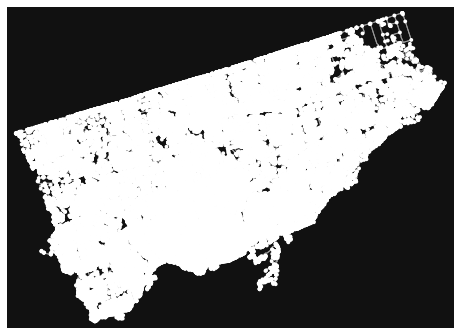

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [1]:
import osmnx as ox
G = ox.graph_from_place('Toronto, Ontario, Canada', network_type='walk')
ox.plot_graph(G)

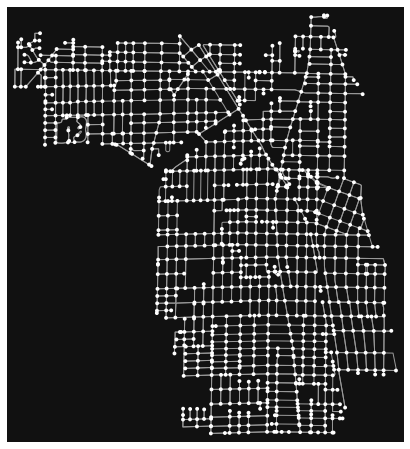

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [5]:
import osmnx as ox
E = ox.graph_from_place('Evanston, Illinois', network_type='drive')
ox.plot_graph(E)

## Trying out some simple operations

### Boundary shapes, project them and plot them
Ottawa may seem in a different scale but it's just that the administrative boundaries are much larger than the actual city. 

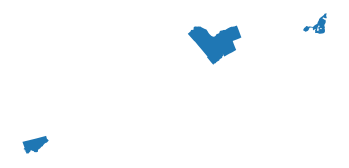

In [4]:
import osmnx as ox
east_cities = ox.geocode_to_gdf(['Toronto', 'Montreal', 'Ottawa'])
east_cities = ox.project_gdf(east_cities)
ax = east_cities.plot()
_ = ax.axis('off')

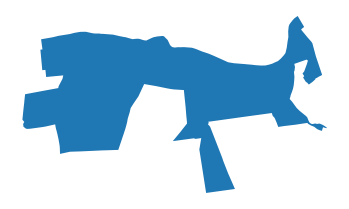

In [2]:
lima = ox.geocode_to_gdf(['Lima, Peru'])
lima = ox.project_gdf(lima)
ax = lima.plot()
_ = ax.axis('off')

### Street network around a focal point
I'm including the circuity average below. Once the network is pulled, one can get some basic network stats. More of them are printed below. 

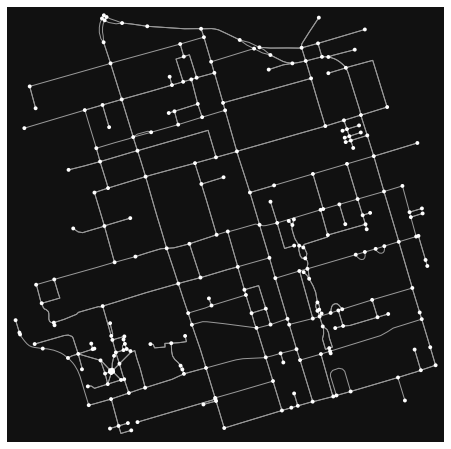

1.0337152968301255


In [7]:
import osmnx as ox
bay_bloor = ox.graph_from_point((43.6687, -79.3871), dist=500, network_type='bike')
ox.plot_graph(bay_bloor)
basic_stats = ox.basic_stats(bay_bloor)
print(basic_stats['circuity_avg']) 

In [8]:
print(basic_stats)

{'n': 253, 'm': 577, 'k_avg': 4.561264822134388, 'edge_length_total': 31408.615999999984, 'edge_length_avg': 54.43434315424607, 'streets_per_node_avg': 2.7035573122529644, 'streets_per_node_counts': {0: 0, 1: 57, 2: 5, 3: 148, 4: 42, 5: 1}, 'streets_per_node_proportions': {0: 0.0, 1: 0.22529644268774704, 2: 0.019762845849802372, 3: 0.5849802371541502, 4: 0.16600790513833993, 5: 0.003952569169960474}, 'intersection_count': 196, 'street_length_total': 18170.45499999999, 'street_segment_count': 328, 'street_length_avg': 55.39772865853656, 'circuity_avg': 1.0337152968301255, 'self_loop_proportion': 0.0}


### Network from address
This is a pretty cool feature since you don't need to pull long and lat. 

In [9]:
help(ox.graph_from_address)

Help on function graph_from_address in module osmnx.graph:

graph_from_address(address, dist=1000, dist_type='bbox', network_type='all_private', simplify=True, retain_all=False, truncate_by_edge=False, return_coords=False, clean_periphery=True, custom_filter=None)
    Create a graph from OSM within some distance of some address.
    
    Parameters
    ----------
    address : string
        the address to geocode and use as the central point around which to
        construct the graph
    dist : int
        retain only those nodes within this many meters of the center of the
        graph
    dist_type : string {"network", "bbox"}
        if "bbox", retain only those nodes within a bounding box of the
        distance parameter. if "network", retain only those nodes within some
        network distance from the center-most node (requires that scikit-learn
        is installed as an optional dependency).
    network_type : string {"all_private", "all", "bike", "drive", "drive_service",

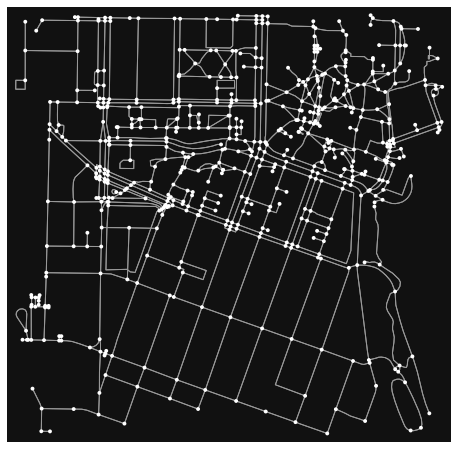

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [8]:
nwsoc = ox.graph_from_address('1810 Chicago Avenue, Evanston, IL 60208', dist = 500, network_type='walk')
ox.plot_graph(nwsoc)